# Fundamental Statistics Visualization on Pokemon

1. import pokemon.csv from input folder
2. import combats.csv from input folder
3. Run basic stats on the data set as instructed.

## Task 3: Explore the combats data and the pokemon data using data visualization tools

In [ ]:
# Write code to show three rows of the combats head

In [ ]:
#Choose any one from the top three combats (one row in combats).
#Note that the participant records are numbers.
#Are they in our pokemon.csv? If so, who are they?
#Write code to show names of the participants and the winer.

In [ ]:
import pandas as pd
combats = pd.read_csv('input/combats.csv')
pokemon = pd.read_csv('input/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
combats.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [ ]:
#Run the code below to update the combats dataframe
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [ ]:
#Run the following commands to see what they do. Refer to the pandas documentation if needed.
#pokemon.describe()
#pokemon['Speed'].head()
#pokemon[["Speed", "Defense"]].head()
#pokemon.iloc[5:11]
#pokemon[pokemon["Generation"] > 5]
#pokemon["Speed"].max()
#pokemon['Generation'].unique()
#pokemon.sort_values(by="HP", ascending=False).head(3)
#pokemon.sort_values(by="HP", ascending=False).iloc[5:10]
#pokemon.rename(columns={'#': 'id'}) #Note that the pokemon is not automatically updated by the result.

#del pokemon['sum'] #Do this if you have caluculated a sum column in your pokemon dataframe.

### Visualize Pokemon Status using Bokeh and the Grammar of Graphics

In [ ]:
from IPython.display import display, Markdown
import pandas as pd
import bokeh


In [ ]:
from bokeh.io import output_notebook
from bokeh.io import show
output_notebook ()

Loading BokehJS ...

In [ ]:
from bokeh.plotting import figure

# Create a canvas with a specific set of tools for the user:
TOOLS = 'pan,box_zoom,wheel_zoom,lasso_select,save,reset,help'
p = figure(width=500, height=500, tools=TOOLS)
print(p)

Figure(id='1003', ...)


In [ ]:
p.triangle(x=pokemon['Speed'], y=pokemon['Defense'])

GlyphRenderer(id='1041', ...)

In [ ]:
show(p)

In [ ]:
#Write code here to determine unique generations.
unique_gen = pokemon['Generation'].unique()
print(unique_gen)

[1 2 3 4 5 6]


In [ ]:
# Mape each generation with a unique color
from bokeh.palettes import brewer
color_map = dict(zip(unique_gen, brewer['Dark2'][len(unique_gen)]))
print(color_map)

{1: '#1b9e77', 2: '#d95f02', 3: '#7570b3', 4: '#e7298a', 5: '#66a61e', 6: '#e6ab02'}


In [ ]:
#Create a data source for each generation
from bokeh.models import ColumnDataSource
data_sources = {}
for gen in unique_gen:
    data_sources[gen] = ColumnDataSource(pokemon[pokemon['Generation']==gen])

In [ ]:
p = figure()
for gen in unique_gen:
    p.triangle(source = data_sources[gen], x='Speed', y='Defense', color = color_map[gen])
show(p)

Another handy static visualization tool is Seaborn. Check it out here: http://seaborn.pydata.org/tutorial/distributions.html

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


C:\Users\AMP-Program\AppData\Local\Temp\ipykernel_18504\2040273264.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon["stats_sum"])


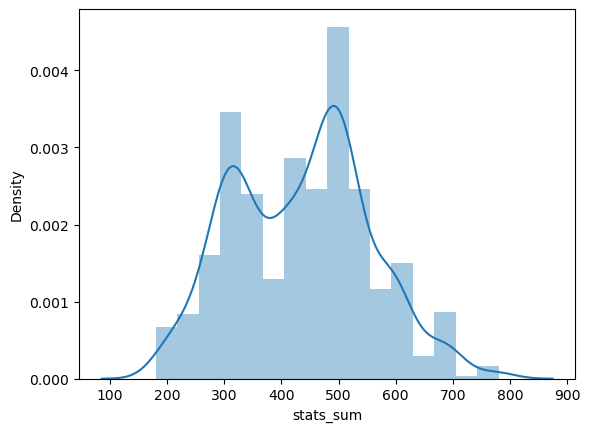

In [ ]:
#Let's view the base status total distribution for all pokemons.
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"])
plt.show()

This distribution histogram shows that base status sum's distribution has a bimodal distribution. First modal is around 300 and the other is around 500.

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


C:\Users\AMP-Program\AppData\Local\Temp\ipykernel_18504\4272833814.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff_stats_sum)


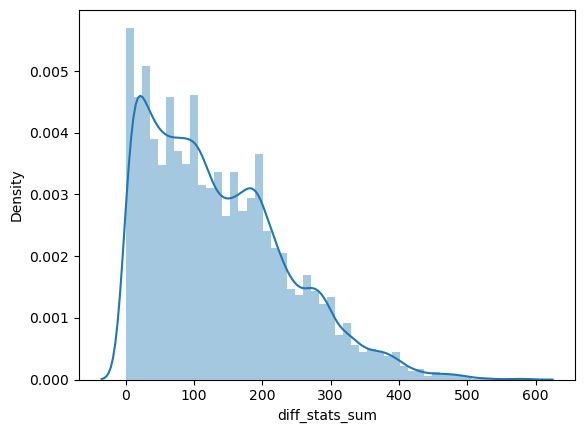

In [ ]:
#Check the difference distribution of total base status in each combat
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)#df replace() function remaps values
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

### Open question: can you find any patterns indicating correlations among the

1.   List item
2.   List item

pokemon stats columns? Write your code and statement of your analysis below.

### Question: Did pokemon with higher total base stats win a battle against pokemon with lower total base stats?

In [ ]:
#Write your code here
#1. calculate the difference between winner and loser's base status scores.
#2 Plot a distribution graph of the difference.

In [ ]:
#combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
#diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
#print(diff_win_lose_stats.describe())
#sns.distplot(diff_win_lose_stats)
#plt.xlabel("diff_win_lose_stats")
#plt.show()

### Explore the combination battles pokemon with lower base stats surpasses one's superiors with more than 80 values.

In [ ]:
stats_sum_dict_re = dict(zip(pokemon['stats_sum'], pokemon['#']))
combats_stats_sum["diff"] = diff_win_lose_stats
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -80]
#print ("Weakers Win Battle number : " + str(len(surpassing_stats_sum)))
surpassing_id = surpassing_stats_sum[cols].replace(stats_sum_dict_re)
surpassing_name = surpassing_id[cols].replace(names_dict)
surpassing_name.join(combats_stats_sum["diff"]).head(8)

,First_pokemon,Second_pokemon,Winner,diff
5,Joltik,Aegislash Shield Forme,Joltik,-201
36,Pancham,Whismur,Whismur,-108
37,Clauncher,Dusclops,Clauncher,-125
42,Goomy,Bouffalant,Goomy,-190
51,Mega Rayquaza,Aegislash Shield Forme,Aegislash Shield Forme,-260
82,Volcanion,Eelektross,Eelektross,-85
106,Carbink,Volcanion,Carbink,-100
111,Fraxure,Carbink,Fraxure,-90


In [ ]:
#Want to know biggest surpassing battles? Use .sort(by="column name")
surpassing_name.join(combats_stats_sum["diff"]).sort_values(by="diff").head()

,First_pokemon,Second_pokemon,Winner,diff
5861,Mega Rayquaza,Cleffa,Cleffa,-562
2480,Mega Rayquaza,Cleffa,Cleffa,-562
41824,Shedinja,Mega Rayquaza,Shedinja,-544
3506,Mega Rayquaza,Inkay,Inkay,-492
20527,Arceus,Shedinja,Shedinja,-484


### Q: How does a weaker win? Does the weaker pokemon attack first help?

In [ ]:
#Write your code to test the idea.
#Hint: In the combats_stats_sum df, create a flag column indicating if the first pokemon is a winner or not.
#Hint: You will only need to plot a portion (selected rows) of the dataframe this time.


In [ ]:
#Key:
#combats_stats_sum["First_Win"] =  combats_stats_sum.apply(lambda x: 1 if x["First_pokemon"] ==  x["Winner"] else 0, axis = 1)
#surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -80]
#sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==0]["diff"], label="First_pokemon_lose")
#sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==1]["diff"], label="First_pokemon_win")
#plt.legend()
#plt.show()